In [2]:
import os
import glob
import time

import pandas as pd
import numpy as np
import xarray as xr;xr.set_options(display_style='text') 
import datetime


import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

import cartopy.crs as ccrs
import cartopy

import sys
p = '/global/homes/q/qnicolas'
if p not in sys.path:
    sys.path.append(p)

from tools.wrfHrTools import *
from tools.generalTools import qsat
from orographicPrecipitation.observationsAndERA5.linearWaveModels import second_derivative_matrix

SCRATCH='/global/cscratch1/sd/qnicolas/'

from scipy.integrate import odeint,solve_ivp
import scipy.linalg as spl
from scipy.integrate import cumtrapz
from scipy.ndimage import gaussian_filter


%load_ext autoreload
%autoreload 2
from ZBP import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# LRF with dirac-like large-scale w

In [3]:
DZ = 100.
zz = np.arange(0.,20e3,DZ)
ww = zz*0

EPSILON = 0.6e-3#1e-6#

Ref = ZBP(zz,ww,epsilon=EPSILON); Ref.integrate(); Ref.calc_precip(); Ref.calc_Q()
Ref.N2 = (g/Ref.TT *(np.gradient(Ref.TT,Ref.zz)+g/cp))

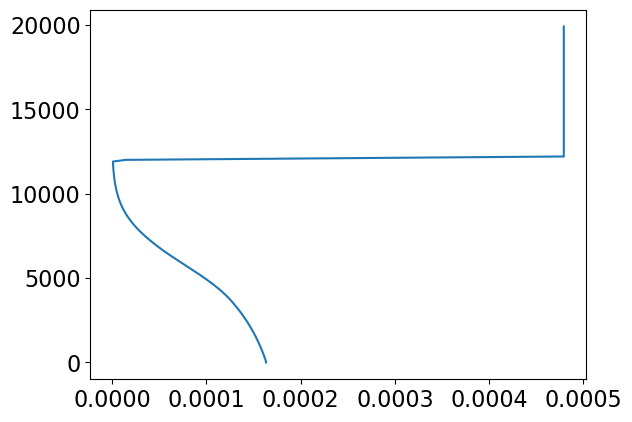

In [9]:
plt.plot(Ref.N2,Ref.zz)

In [16]:
ztrop = Ref.zz[np.argmax(Ref.TT<=Tt)]
ww = np.sin(Ref.zz/ztrop*np.pi)*0.001 * (Ref.zz<ztrop)

Test1 = ZBP(zz,ww)    ; Test1.integrate(); Test1.calc_precip(); Test1.calc_Q()


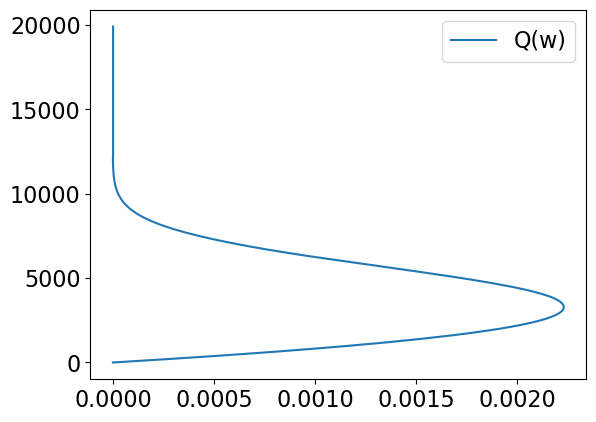

In [11]:
plt.plot(Test1.Q,zz,label='Q(w)')
plt.legend()

In [17]:
Tests = [ZBP(zz,ww*np.eye(200)[i]) for i in range(120)]
for i in range(120):
    Tests[i].integrate(); Tests[i].calc_precip(); Tests[i].calc_Q()

In [21]:
Qs = np.array([(Tests[i].Q-Ref.Q) for i in range(120)]).sum(axis=0)

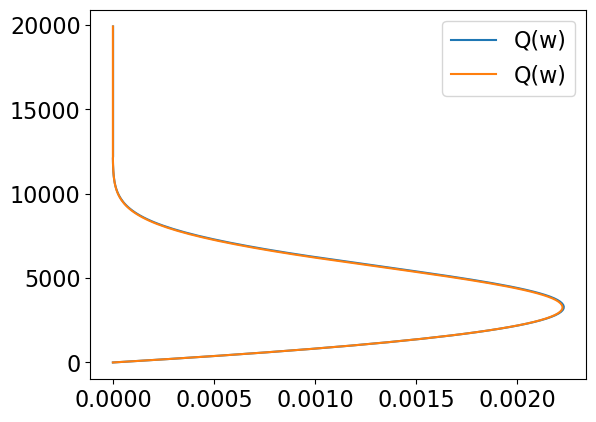

In [22]:
plt.plot(Test1.Q,zz,label='Convective heating, full w')
plt.plot(Qs,zz,label='Convective heating, from LRF')
plt.legend()

In [24]:
Ts = np.array([(Tests[i].TT-Ref.TT) for i in range(120)]).sum(axis=0)

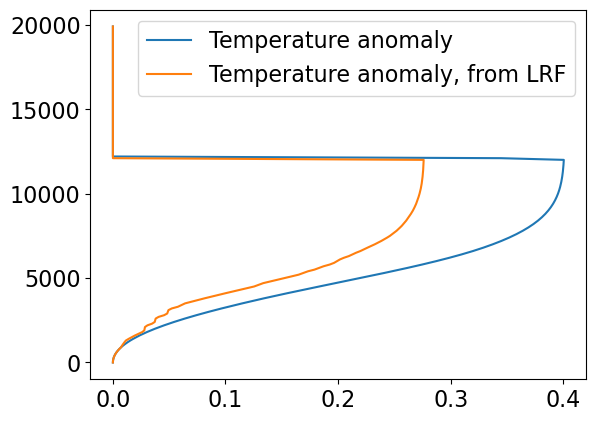

In [29]:
plt.plot(Test1.TT-Ref.TT,zz,label='Temperature anomaly')
plt.plot(Ts,zz,label='Temperature anomaly, from LRF')
plt.legend()

In [27]:
qs = np.array([(Tests[i].qq-Ref.qq) for i in range(120)]).sum(axis=0)

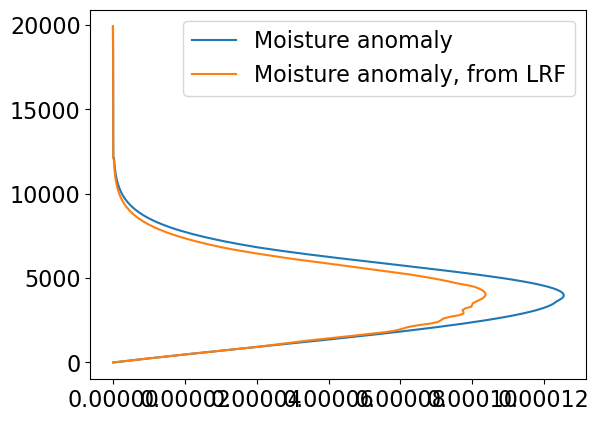

In [30]:
plt.plot(Test1.qq-Ref.qq,zz,label='Moisture anomaly')
plt.plot(qs,zz,label='Moisture anomaly, from LRF')
plt.legend()

# LRF with large-scale T/q forcings

In [ ]:
Tests_w = [ZBP(zz,1e-2*np.eye(200)[i]) for i in range(200)]
for i in range(200):
    Tests_w[i].integrate(); Tests_w[i].calc_precip(); Tests_w[i].calc_Q()

In [ ]:
Tests_ls_q = [ZBPls(zz,0.*zz,np.zeros(200),1e-4*np.eye(200)[i]) for i in range(120)]
for i in range(120):
    Tests_ls_q[i].integrate(); Tests_ls_q[i].calc_precip(); Tests_ls_q[i].calc_Q()

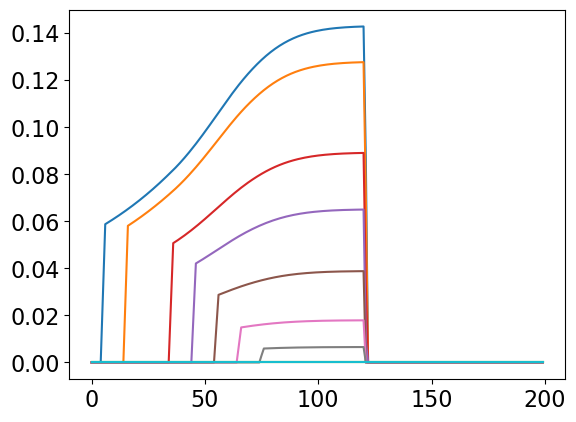

In [47]:
for i in range(5,100,10):
    plt.plot((Tests_w[i].TT-Ref.TT))

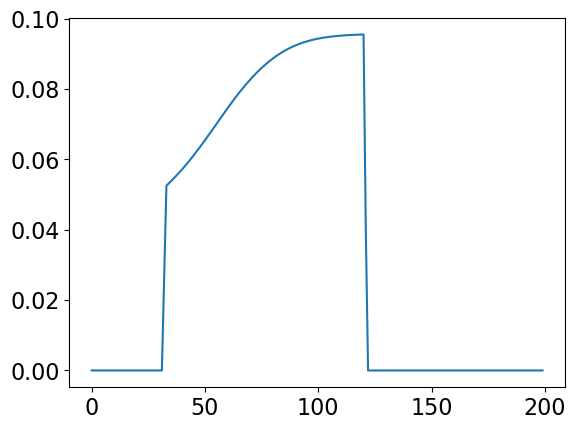

In [ ]:
plt.plot((Tests_w[32].TT-Ref.TT))

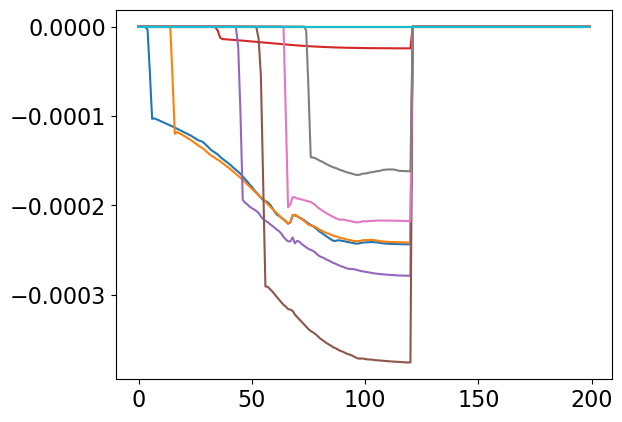

In [ ]:
for i in range(5,100,10):
    plt.plot((Tests_ls_q[i].TT-Ref.TT))

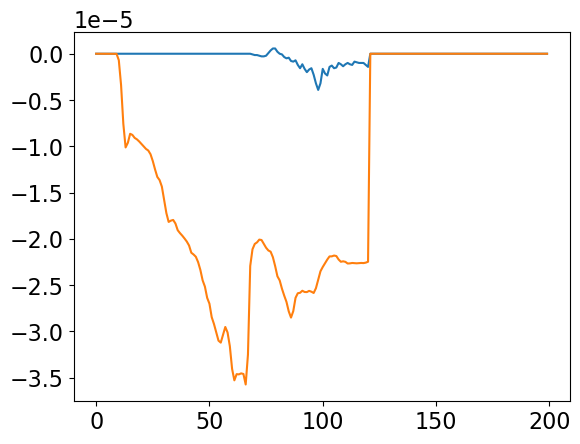

In [ ]:
plt.plot((Tests_ls_T[10].TT-Ref.TT)*2.5e6)
plt.plot(Tests_ls_q[10].TT-Ref.TT)

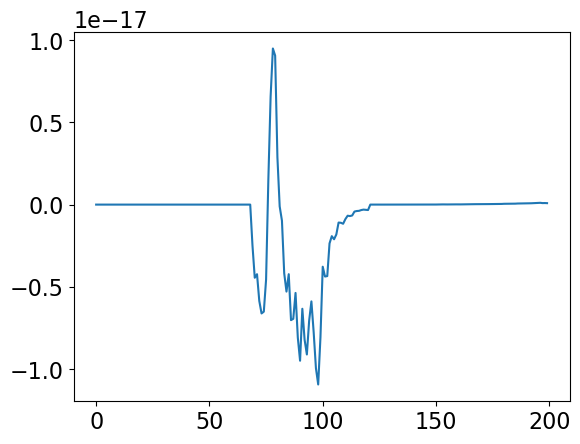

In [ ]:
plt.plot((Tests_ls_T[10].qq-Ref.qq))
#plt.plot(Tests_ls_q[10].qq-Ref.qq)

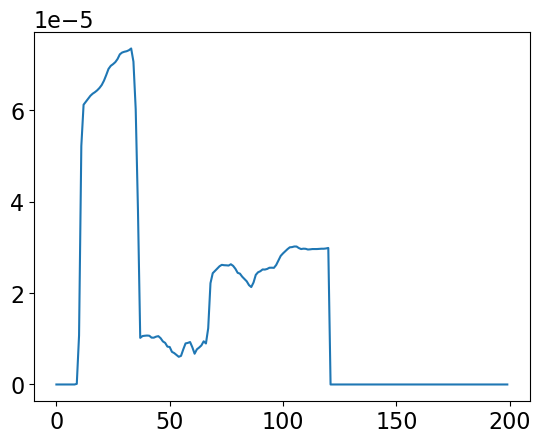

In [ ]:
plt.plot(Tests[10].TT-Ref.TT)

In [71]:
ztrop = Ref.zz[np.argmax(Ref.TT<=Tt)]
ww = np.sin(4*Ref.zz/ztrop*np.pi)*0.001 * (Ref.zz<ztrop)
Test2 = ZBP(zz,ww)    ; Test2.integrate()

In [91]:
Test3 = ZBPls(zz,ww,np.sin(3*Ref.zz/ztrop*np.pi)*0.001 * (Ref.zz<ztrop),np.zeros(200))    ; Test3.integrate()

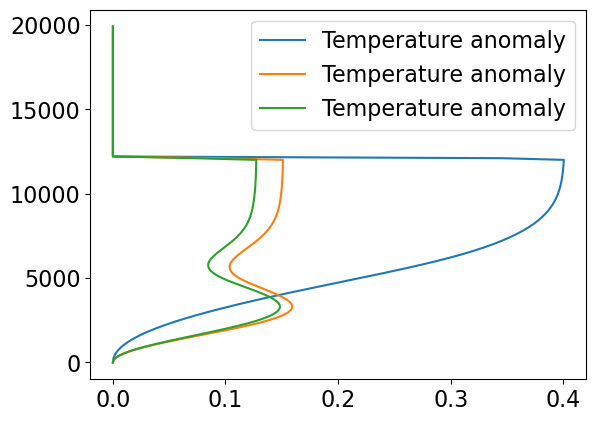

In [92]:
plt.plot(Test1.TT-Ref.TT,zz,label='Temperature anomaly')
plt.plot(Test2.TT-Ref.TT,zz,label='Temperature anomaly')
plt.plot(Test3.TT-Ref.TT,zz,label='Temperature anomaly')

plt.legend()